In [454]:
import cv2
from PIL import Image
import random
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json

In [455]:
torch.utils

<module 'torch.utils' from '/Users/tnluser/opt/anaconda3/lib/python3.9/site-packages/torch/utils/__init__.py'>

In [456]:
from english_words import get_english_words_set

In [457]:
web2lowerset = list(get_english_words_set(['web2'], lower=True))

In [458]:
json.dump(web2lowerset, open('words.json', 'w'))

In [459]:
web2lowerset = json.load(open('words.json'))

In [460]:
len(web2lowerset)

234450

In [461]:
set([e for l in web2lowerset for e in list(l)])

{'-',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [462]:
types = ['nu', 'wo', 'nuwo']
random.choice(types)

'nuwo'

In [463]:
t_string = list(random.choice(web2lowerset))
indices = random.choices(list(range(len(t_string))), k=len(t_string)//3)
for i in indices: t_string[i] = str(random.randint(0, 10))
string = ''.join(t_string)
string

'pat8ha09e'

In [464]:
string

'pat8ha09e'

In [465]:
random.random()

0.7099752518898058

In [466]:
def generate_random_string():
    types = ['nu', 'wo', 'nuwo']
    ty = random.choice(types)
    string = ''
    if ty == 'nu':
        length = random.randint(1, 10)
        for i in range(length): string+= str(random.randint(0, 10))
    if ty == 'wo':
        string = random.choice(web2lowerset)
    if ty == 'nuwo':
        t_string = list(random.choice(web2lowerset))
        indices = random.choices(list(range(len(t_string))), k=len(t_string)//3)
        for i in indices: t_string[i] = str(random.randint(0, 10))
        string = ''.join(t_string)
    if random.random() > 0.5: string = string.upper()
    return string[:10]
for i in range(10): print(generate_random_string())

UNFED10RA0
THE1EBESID
489841019
HYPO8ERMAT
POMACENTRO
5484639100
unflank
CO6L6RET
WRICK
175


In [467]:
mx = 0
for i in tqdm(range(1000000)):
    le = len(generate_random_string())
    if le > mx: mx = le
mx

  0%|          | 0/1000000 [00:00<?, ?it/s]

10

In [468]:
torch.zeros((40, 100, 3)).shape

torch.Size([40, 100, 3])

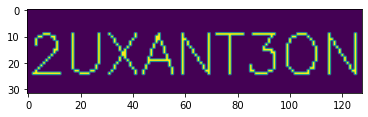

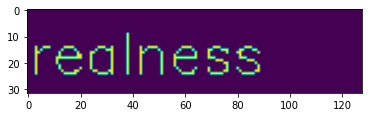

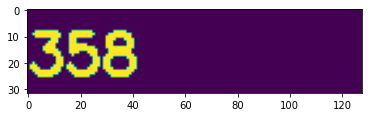

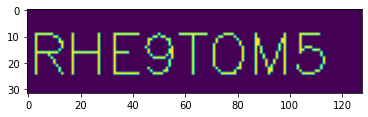

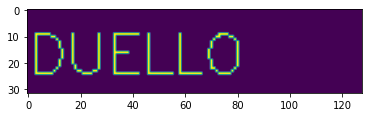

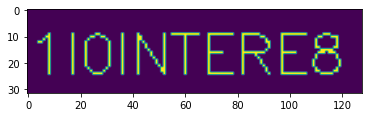

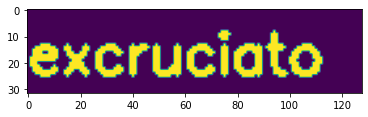

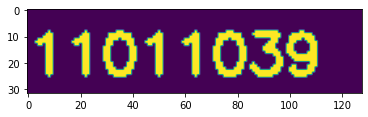

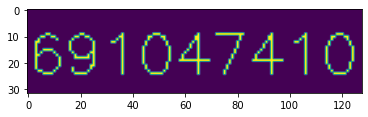

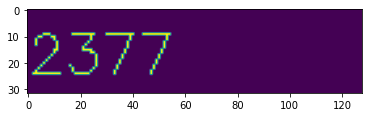

In [469]:
def generate_random_text_image():
    string = generate_random_string()
    img = torch.zeros((32, 128, 1))
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (0, 24)
    fontScale = 0.7
    color = (255)
    thickness = random.choice(list(range(1, 3)))
    img = cv2.putText(img.numpy(), string, org, font, fontScale, color, thickness, cv2.LINE_AA)
    return torch.tensor(img)

for i in range(10):
    plt.imshow(generate_random_text_image())
    plt.show()

In [470]:
import BaseTextDetectorModel
import importlib
importlib.reload(BaseTextDetectorModel)

<module 'BaseTextDetectorModel' from '/Users/tnluser/PERSONAL/bb/notebooks/BaseTextDetectorModel.py'>

In [471]:
sample_input = torch.stack([generate_random_text_image() for i in range(10)]).transpose(1, 3).transpose(3, 2)
sample_input.shape

torch.Size([10, 1, 32, 128])

In [472]:
model = BaseTextDetectorModel.BaseTextDetector(63)
model.forward(sample_input).shape

AttributeError: 'tuple' object has no attribute 'shape'

In [473]:
model

BaseTextDetector(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (conv5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 

In [392]:
10*10**5

1000000

In [393]:
dataset = BaseTextDetectorModel.ImageTextDataset(10*(10**5))

In [394]:
len(dataset)

1000000

In [395]:
dataset[0][1]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])

In [396]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16)

In [397]:
from torch import optim

In [398]:
device='cpu'

In [399]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = torch.nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.3)

In [400]:
lrs = []
losses = []
for epoch in range(5):
    epoch_loss = 0
    batches=0
    print('epoch -', epoch)
    lrs.append(optimizer.param_groups[0]['lr'])
    print('learning rate', lrs[-1])
    for img, label in tqdm(dataloader):
        batches+=1
        optimizer.zero_grad()
        out = model(img.to(device))
        out = out.squeeze(2)
        loss = loss_function(out, label)
        epoch_loss+=loss
        loss.backward()
        optimizer.step()
    losses.append(epoch_loss.cpu().detach().numpy()/batches)
    scheduler.step()
    print('epoch_loss', losses[-1])

epoch - 0
learning rate 0.001


  0%|          | 0/62500 [00:00<?, ?it/s]

KeyboardInterrupt: 